# Exploración de datos complementaria

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../datos/DATA_HLF_MDS_2.csv', sep=',')  # .sample(n=10000, random_state=0)

In [2]:
def resumen_columna(dataframe,columna):
    largo = len(dataframe[columna])
    print("Largo de columna = {}".format(largo))
    print('Cantidad de valores nulos en columna {}: {}'.format(columna,dataframe.isna().sum()[columna]))
    dup = dataframe[columna].duplicated().sum()
    print('Total de {} filas duplicadas ({}%)'.format(dup,"{:.1f}".format(100*dup/largo)))
    sin = len(dataframe[columna].value_counts())
    print('Cantidad de valores únicos : {} ({}%)'.format(sin,"{:.1f}".format(100*sin/largo)))

## RESUMEN

In [3]:
resumen_columna(df,'RESUMEN')

Largo de columna = 1526557
Cantidad de valores nulos en columna RESUMEN: 1
Total de 1473779 filas duplicadas (96.5%)
Cantidad de valores únicos : 52777 (3.5%)


In [5]:
df = df[df['RESUMEN'].notna()]

**Tabla de tokens más frecuentes**

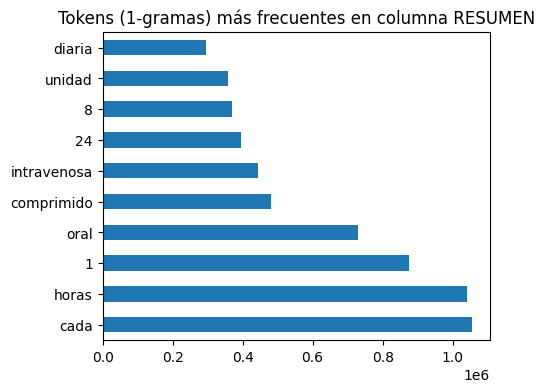

In [6]:
mas_comunes =  pd.Series(' '.join(df['RESUMEN']).lower().split()).value_counts()
mas_comunes[:10].plot.barh(figsize=(5, 4),title='Tokens (1-gramas) más frecuentes en columna RESUMEN');

In [7]:
from collections import Counter
from nltk import ngrams

def common_ngrams(df,n):
    ngram_counts = Counter(ngrams(' '.join(df['RESUMEN']).lower().split(), n))
    comunes_2g = ngram_counts.most_common(10)
    series_2g = pd.Series([tup[1] for tup in comunes_2g],index=[' '.join(tup[0]) for tup in comunes_2g])
    series_2g.plot.barh(figsize=(5, 5),title='{}-gramas más frecuentes en columna RESUMEN'.format(n));

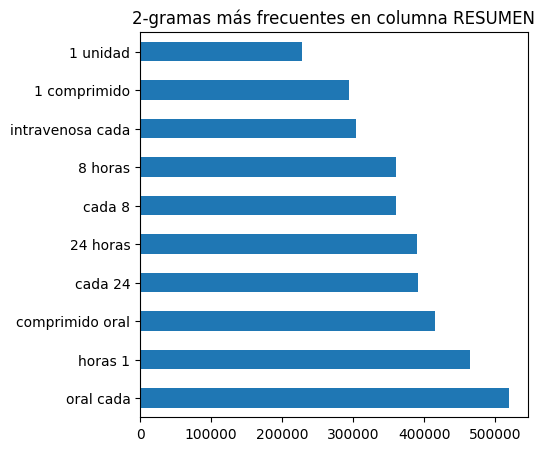

In [8]:
common_ngrams(df,2)

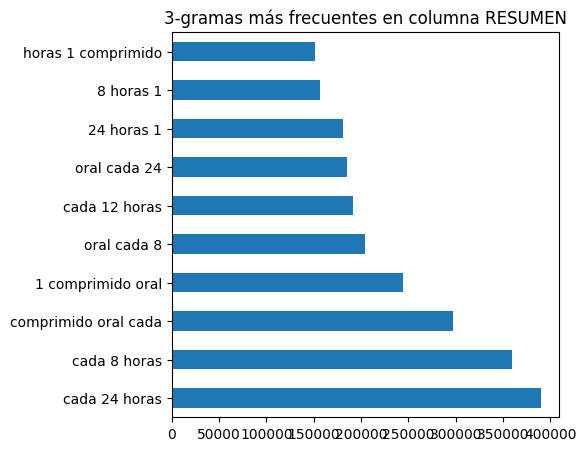

In [9]:
common_ngrams(df,3)